# Analysis of the MIMIC-III Dataset

## Abstract
[words here! also results!]

## Introduction

MIMIC-III (Medical Information Mart for Intensive Care III) is a large, publicly available database composed of health information related to deidentified patients admitted to critical care units of the Beth Israel Deaconess Medical Center between 2001 and 2012. [Johnson, 2016 ; https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4878278/] This database has been utilized by researchers across the globe to study patient critical care outcomes, develop predictive models, and apply machine learning techniques to analyze patient health data. [citations needed]

MIMIC-III is a relational database consisting of 26 tables. [Johnson, 2016 ; https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4878278/] This database includes detailed infomration such as patient demographics, vital signs, laboratory results, and diagnoses.  [need to find papers that use the MIMIC-III database] The rich depth and scope of the dataset have enabled advancements in the fields of medical research and artificial intelligence. [citation needed]

This study utilizes MIMIC-III version 1.4, which is the most current version of the database at the time of analysis. [Johnson, 2016 ; https://doi.org/10.13026/C2XW26] The analysis conducted in this journal explore distribution of patient demographics, time series analysis of ICU admission, and likelihood of patient readmission using detailed graphics and machine learning algorithms.

PAPERS TO READ:
https://www.nature.com/articles/sdata201917/
https://www.nature.com/articles/s41598-018-24271-9
https://www.nature.com/articles/s41746-018-0029-1
https://www.sciencedirect.com/science/article/pii/S1532046418302361

## Exploratory Data Analysis and Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from query import query_a, query_b, query_c, query_d, mapped_ethnicies, mapped_diagnosis

### Age and Gender Distribution

In [2]:
### What are the age and gender distributions of patients admitted to the ICU?

df_a = query_a()
df_a['death_time'] = pd.Categorical(df_a['death_time'], categories=["death within hospital", "death within 90 days of discharge", "death not within 90 days of discharge"], ordered=True)
df_a['age'] = df_a['age'].apply(lambda x: 100 - x if x > 79 else x)

print(df_a.head(2))
df_a.info()

  gender  age     los  death_days                             death_time  \
0      F   65  3.2490           0                  death within hospital   
1      M   74  8.8143        2978  death not within 90 days of discharge   

   hospital_expire_flag  
0                     1  
1                     0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52125 entries, 0 to 52124
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   gender                52125 non-null  object  
 1   age                   52125 non-null  int64   
 2   los                   52121 non-null  float64 
 3   death_days            52125 non-null  int64   
 4   death_time            52125 non-null  category
 5   hospital_expire_flag  52125 non-null  int64   
dtypes: category(1), float64(1), int64(3), object(1)
memory usage: 2.0+ MB


According to overview of the data, we have gender and age information on patients, along with their length of stay and how long after hospital ICU admission their reported death was. The hospital expire flag notes whether the patient died within the hospital (1) or outside of the hospital (0). There are a total of 371 patient records in this set. Patients who were above the age of 79 at admission have had their ages obsurced for HIPAA and have an age of 300 years; these patient records were removed during the query process. The age column was adjusted to account for records with ages above 79 being removed from analysis; any ages, then, recorded above 79 are erroneous and must be adjusted. For instance, a 91-year-old patient would not have their age recorded as 91, but as 300. Likely, this means that there was a computing error in the year of birth and admittance year by a difference of 100, meaning this patient should be 9-years-old.

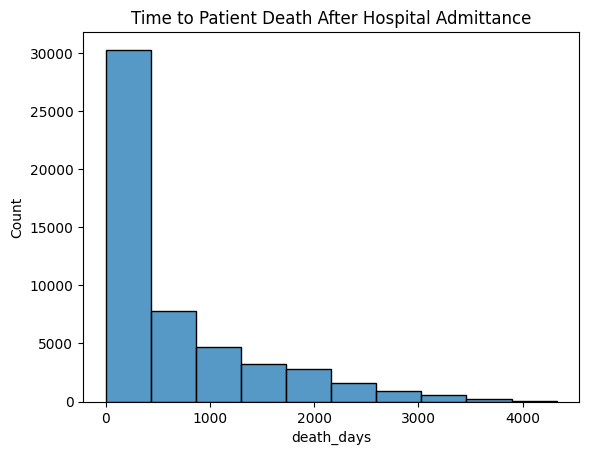

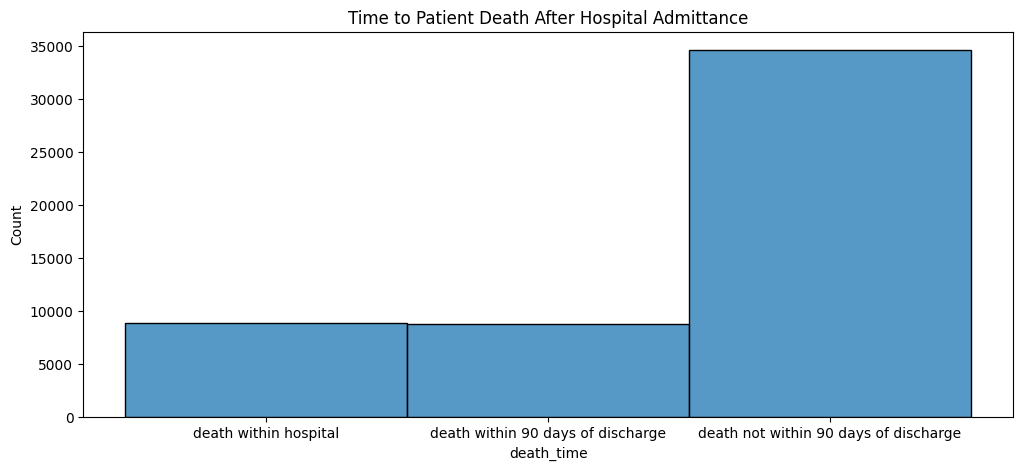

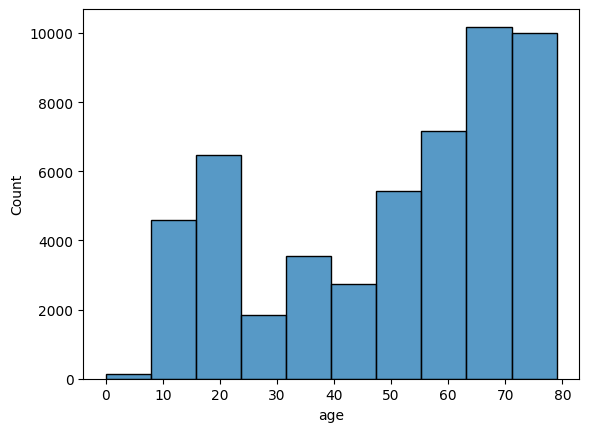

count    52125.000000
mean        50.548355
std         22.073785
min          0.000000
25%         31.000000
50%         57.000000
75%         69.000000
max         79.000000
Name: age, dtype: float64


In [3]:
sns.histplot(df_a['death_days'], bins=10)
plt.title('Time to Patient Death After Hospital Admittance')
plt.show()

f, ax = plt.subplots(figsize = (12,5))

sns.histplot(df_a['death_time'])
plt.title('Time to Patient Death After Hospital Admittance')
plt.show()

sns.histplot(df_a['age'], bins=10)
plt.show()

print(df_a['age'].describe()) # print to md

The above plot is skewed right, suggesting that many of the patients admitted to the ICU do not die within even 250 days of hospital admittance. [talk about age] [discuss mortality rate; majority of patients do not die within the ICU]

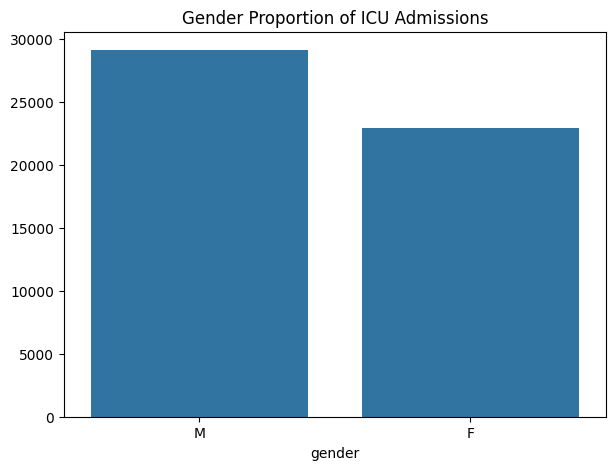

gender
M    29149
F    22976
Name: count, dtype: int64


In [5]:
f, ax = plt.subplots(figsize = (7,5))
gender_counts = df_a['gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Proportion of ICU Admissions')
plt.show()

print(df_a['gender'].value_counts())

The majority of the patients admitted to the ICU are male (%).

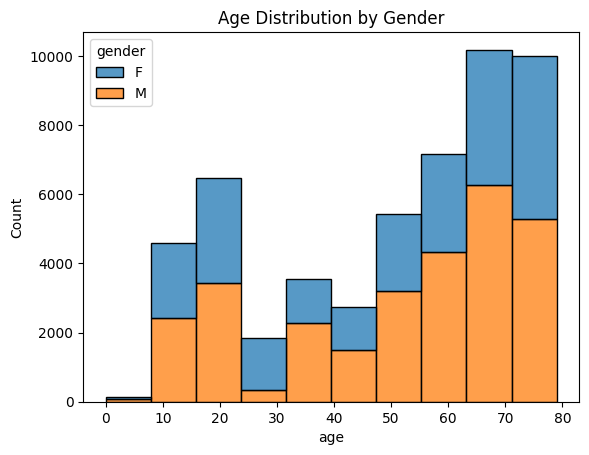

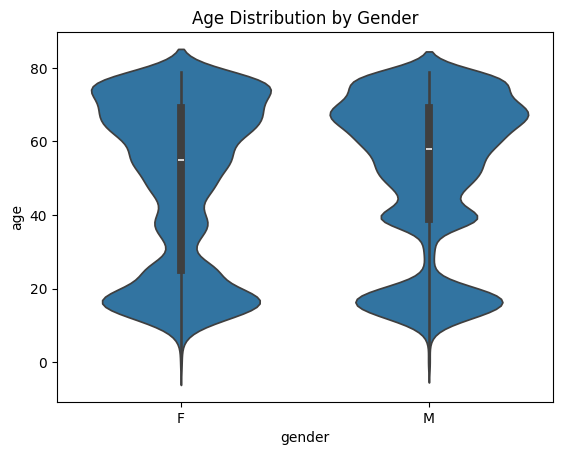

In [6]:
sns.histplot(data=df_a, x='age', hue='gender', multiple='stack', bins=10)
plt.title('Age Distribution by Gender')
plt.show()

sns.violinplot(x='gender', y='age', data=df_a)
plt.title('Age Distribution by Gender')
plt.show()

[age distribution of patients by gender]

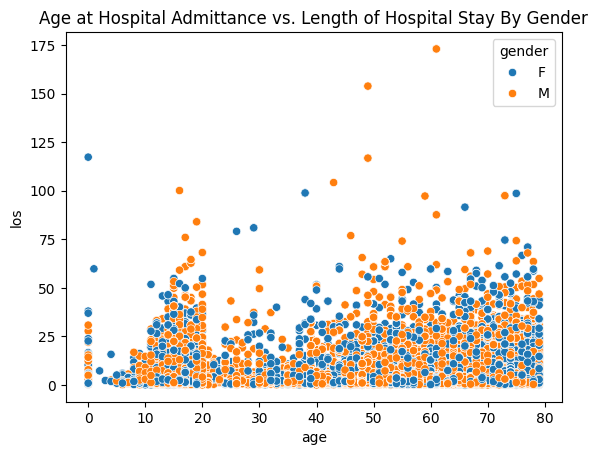

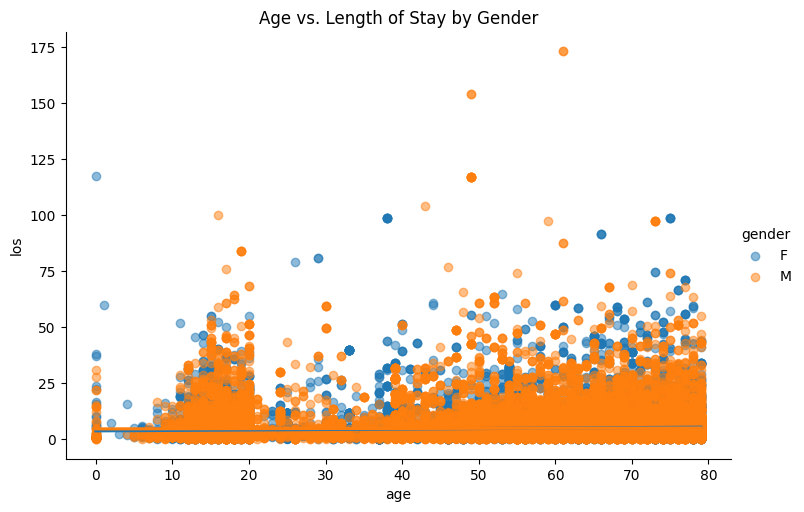

In [7]:
sns.scatterplot(x='age', y='los', hue = 'gender', data=df_a)
plt.title('Age at Hospital Admittance vs. Length of Hospital Stay By Gender')
plt.show()

sns.lmplot(x='age', y='los', hue='gender', data=df_a, aspect=1.5, scatter_kws={'alpha':0.5})
plt.title('Age vs. Length of Stay by Gender')
plt.show()

[remark about clusters + outliers in length of stay + implications of trend lines and their error bands]

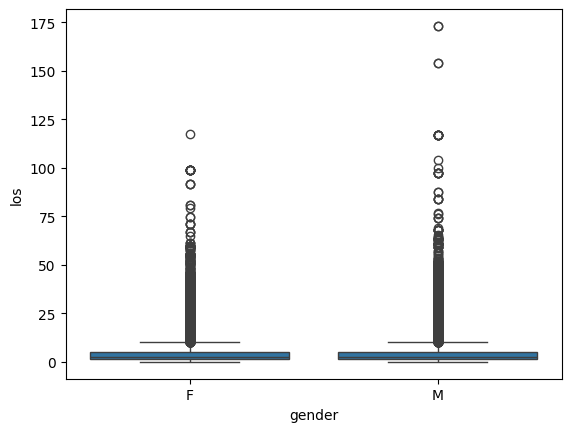

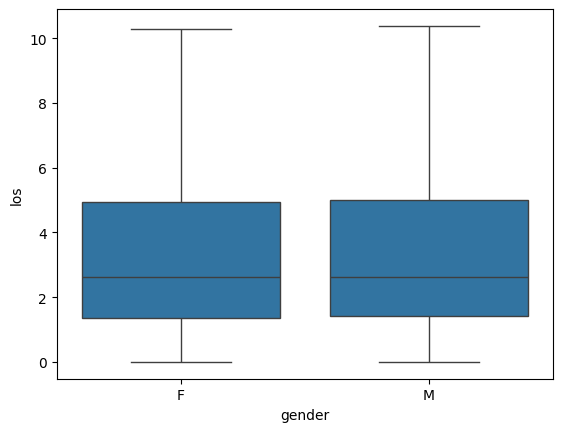

gender                F             M
los count  22976.000000  29145.000000
    mean       4.793814      4.914960
    std        7.091207      7.552335
    min        0.000100      0.000200
    25%        1.370800      1.422200
    50%        2.610000      2.633800
    75%        4.937400      5.005500
    max      117.335100    173.072500

In [17]:
sns.boxplot(x='gender', y='los', data=df_a)
plt.show()

sns.boxplot(x='gender', y='los', data=df_a, showfliers = False)
plt.show()

df_a[['gender', 'los']].groupby('gender').describe().transpose()

[males tend to have a longer stay at the ICU on avg. is this due to males being more likely to die? or males being the majority of older patients? show more graphs below!]

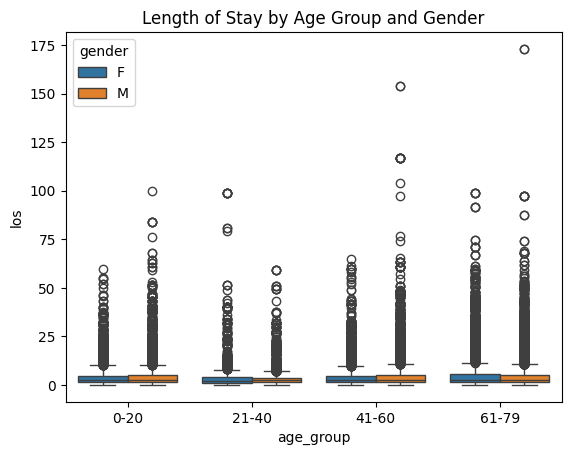

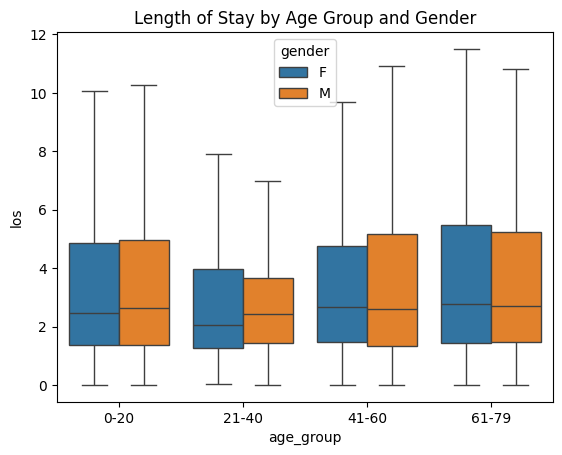

In [19]:
df_a['age_group'] = pd.cut(df_a['age'], bins=[0, 20, 40, 60, 80], labels=['0-20', '21-40', '41-60', '61-79'])
sns.boxplot(x='age_group', y='los', hue='gender', data=df_a)
plt.title('Length of Stay by Age Group and Gender')
plt.show()

sns.boxplot(x='age_group', y='los', hue='gender', data=df_a, showfliers = False)
plt.title('Length of Stay by Age Group and Gender')
plt.show()

[what does this imply about gender and los? what is the average los for men across all ages? females?]

### Demographic Analysis

In [2]:
### What are the demographics of patients admited to the ICU?
### What are the diagnoses of patients admitted to the ICU?
### What are the most common admission diagnoses for different age groups?
df_b = query_b()
df_b['death_time'] = pd.Categorical(df_b['death_time'], categories=["death within hospital", "death within 90 days of discharge", "death not within 90 days of discharge"], ordered=True)
#df_b['age'] = df_b['age'].apply(lambda x: 100 - x if x > 79 else x)

print(df_b.head(2))
df_b.info()

## TODO: figure out why ages aren't working??

  gender   age insurance      religion marital_status           ethnicity  \
0      F  65.0  Medicare      CATHOLIC      SEPARATED  HISPANIC OR LATINO   
1      M   NaN  Medicaid  UNOBTAINABLE         SINGLE               WHITE   

                  diagnosis     los  death_days  \
0                   DYSPNEA  3.2490         0.0   
1  SEPSIS;PILONIDAL ABSCESS  3.2788         NaN   

                          death_time  hospital_expire_flag  
0              death within hospital                     1  
1  death within 90 days of discharge                     0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116426 entries, 0 to 116425
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   gender                116426 non-null  object  
 1   age                   56096 non-null   float64 
 2   insurance             116426 non-null  object  
 3   religion              115901 non-null  object  
 4

This query includes new information, including insurance type, religion, marital status, self-reported ethnicity, and ICU diagnosis. This data allows for analysis on patient demographics and admission diagnoses.

In [3]:
df_b['ethnicity'] = mapped_ethnicies(df_b['ethnicity'])

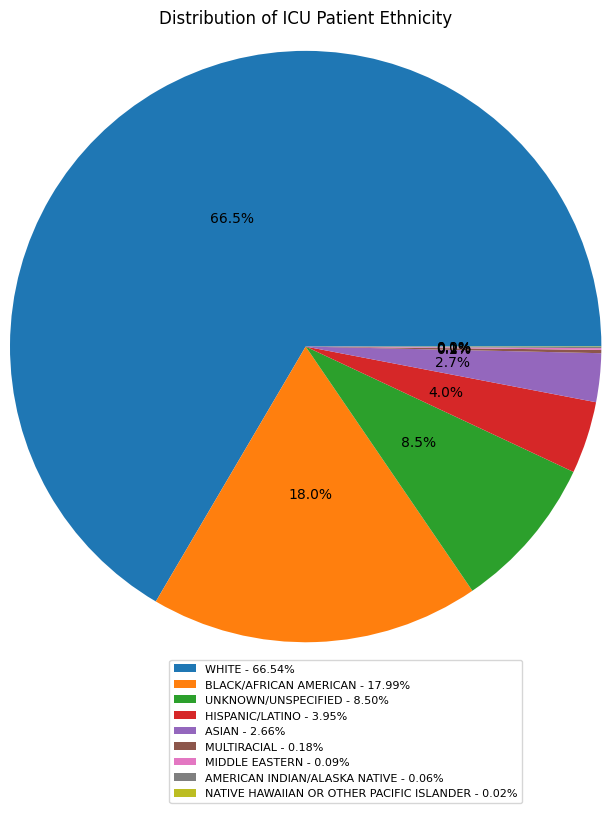

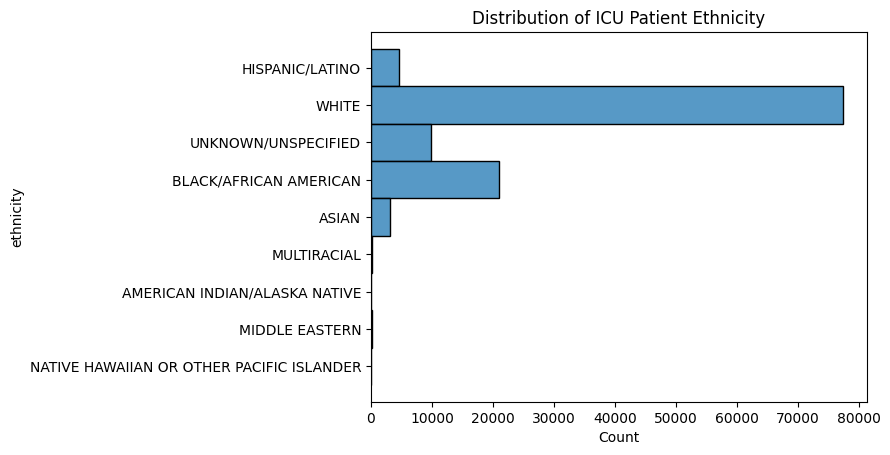

In [4]:
eth_counts = df_b['ethnicity'].value_counts()
eth_labels = eth_counts.index
eth_percentages = eth_counts / eth_counts.sum() * 100

f, ax = plt.subplots()
patches, texts, autotexts = ax.pie(eth_counts, labels = None, autopct='%1.1f%%', pctdistance=0.5, radius = 2)
legend_labels = [f'{label} - {percentage:.2f}%' for label, percentage in zip(eth_labels, eth_percentages)]
plt.title(label = "Distribution of ICU Patient Ethnicity", pad = 20, y = 1.3)
plt.legend(patches, legend_labels, loc='lower right', fontsize=8, bbox_to_anchor=(1.1,-.75))
plt.show()

sns.histplot(y = df_b['ethnicity'])
plt.title('Distribution of ICU Patient Ethnicity')
plt.show()

[describe ethnicity of general patients in the ICU]

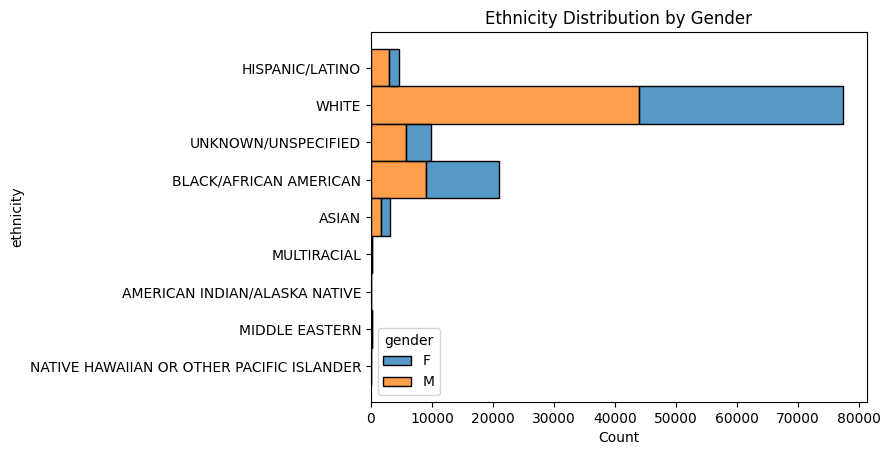

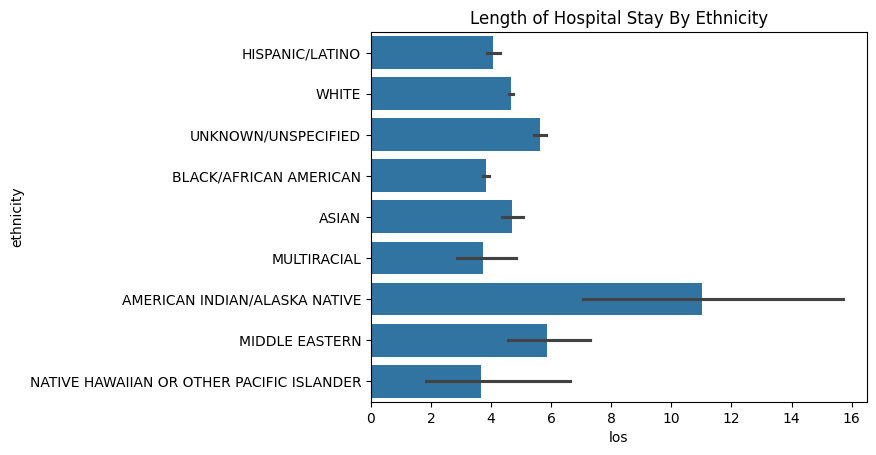

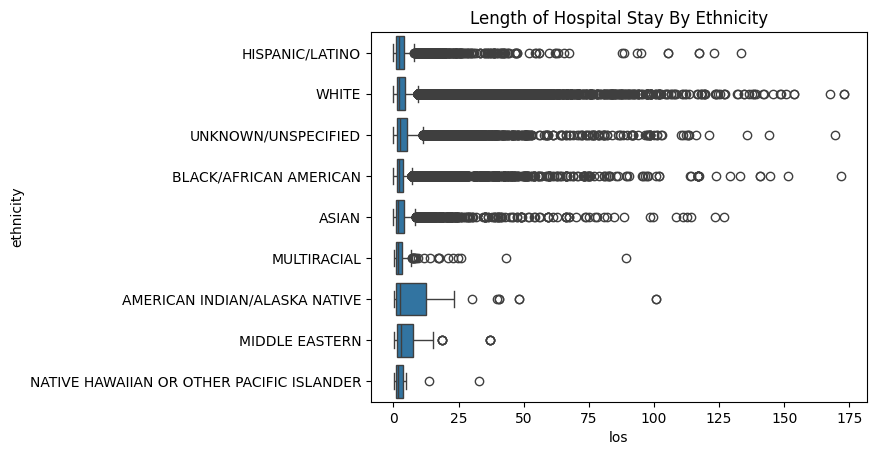

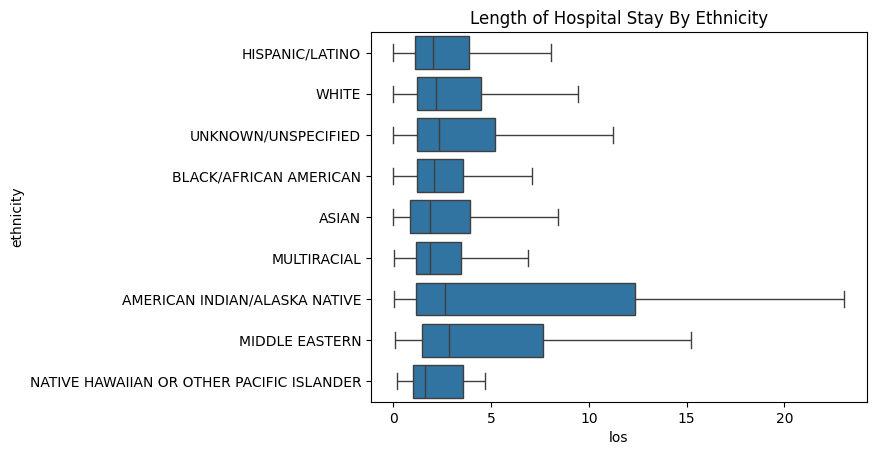

In [5]:
sns.histplot(data=df_b, y='ethnicity', hue='gender', multiple='stack')
plt.title('Ethnicity Distribution by Gender')
plt.show()

sns.barplot(y='ethnicity', x='los', data=df_b)
plt.title('Length of Hospital Stay By Ethnicity')
plt.show()

sns.boxplot(y='ethnicity', x='los', data=df_b)
plt.title('Length of Hospital Stay By Ethnicity')
plt.show()

sns.boxplot(y='ethnicity', x='los', data=df_b, showfliers = False)
plt.title('Length of Hospital Stay By Ethnicity')
plt.show()

[discuss variability and how a boxplot more clearly represents the data]

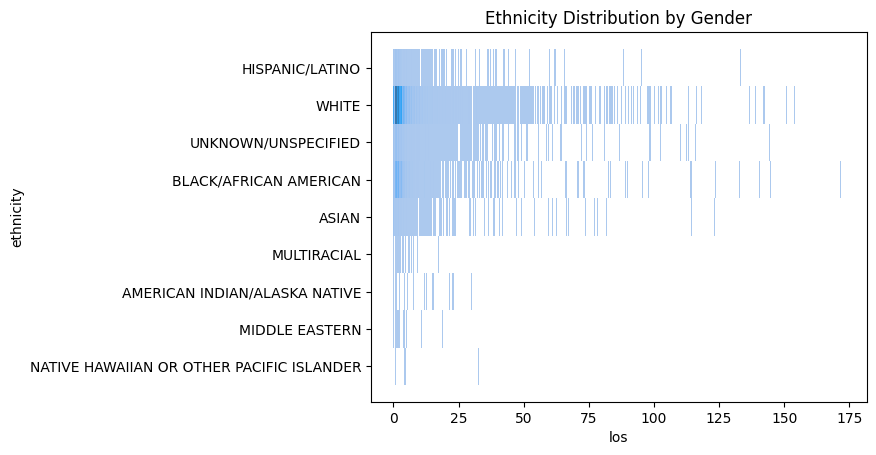

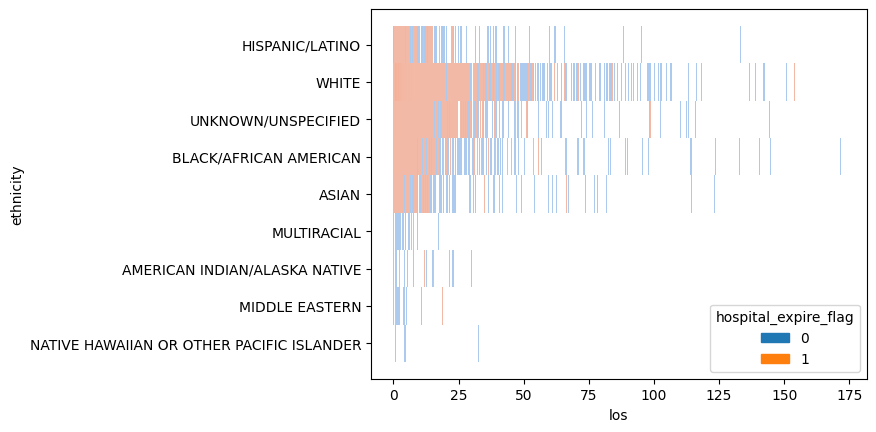

In [11]:
sns.histplot(data=df_b, y='ethnicity', x = 'los')
plt.title('Ethnicity Distribution by Gender')
plt.show()

ax = sns.histplot(data=df_b, y='ethnicity', x = 'los', hue = 'hospital_expire_flag', multiple='stack')
sns.move_legend(ax, loc = 'lower right')
plt.show()

[about above plots]

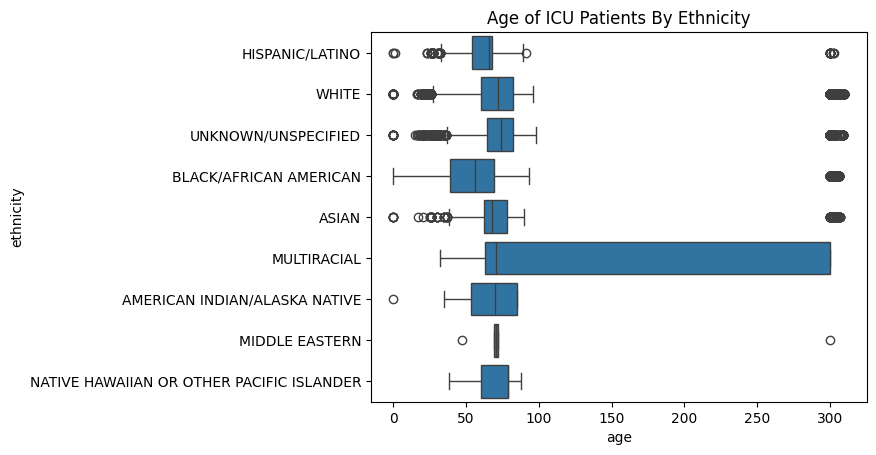

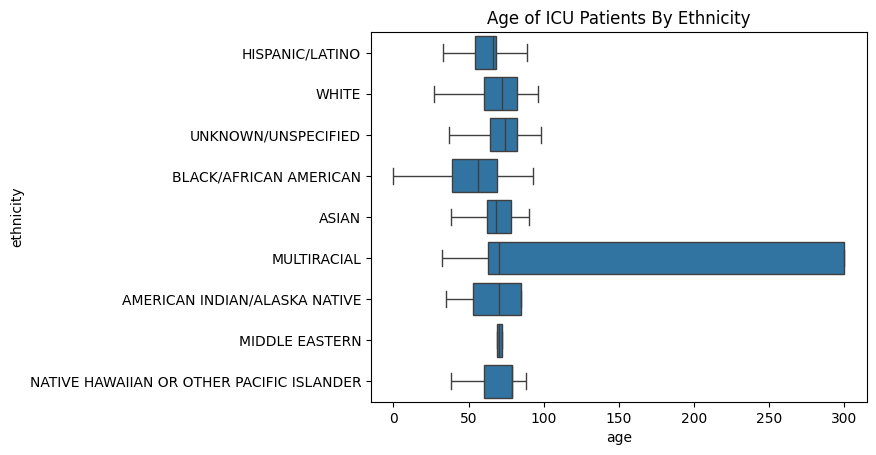

In [13]:
sns.boxplot(y='ethnicity', x='age', data=df_b)
plt.title('Age of ICU Patients By Ethnicity')
plt.show()

sns.boxplot(y='ethnicity', x='age', data=df_b, showfliers = False)
plt.title('Age of ICU Patients By Ethnicity')
plt.show()

[about ages of patients]

In [3]:
#df_b['diagnosis'].value_counts().head(50)
df_b['diagnosis_category'] = mapped_diagnosis(df_b['diagnosis'])
category_counts = df_b['diagnosis_category'].value_counts()

#print(category_counts)
df_b['diagnosis'][df_b['diagnosis_category'] == "Other"].value_counts().head(50)

diagnosis
FEVER                          1664
ETOH WITHDRAWAL                 584
OVERDOSE                        311
WEAKNESS                        242
ALCOHOL WITHDRAWAL              227
DEHYDRATION                     223
HEMOPTYSIS                      208
HYPERGLYCEMIA                   208
ETOH INTOXICATION               161
UNRESPONSIVE                    141
HEADACHE                        128
ANGIOEDEMA                      104
COMPLETE HEART BLOCK            104
CHRONIC OBST PULM DISEASE       103
AIRWAY OBSTRUCTION               95
+ETT\CATH                        90
NAUSEA-VOMITING                  90
ANEURYSM/SDA                     88
LYMPHOMA                         85
ATRIAL FIBRILLATION              84
COLITIS                          83
CHF EXACERBATION                 82
ETOH WITHDRAWL                   77
LEG PAIN                         77
TRACHEAL STENOSIS                76
MORBID OBESITY/SDA               73
CIRRHOSIS                        72
DIVERTICULITIS    

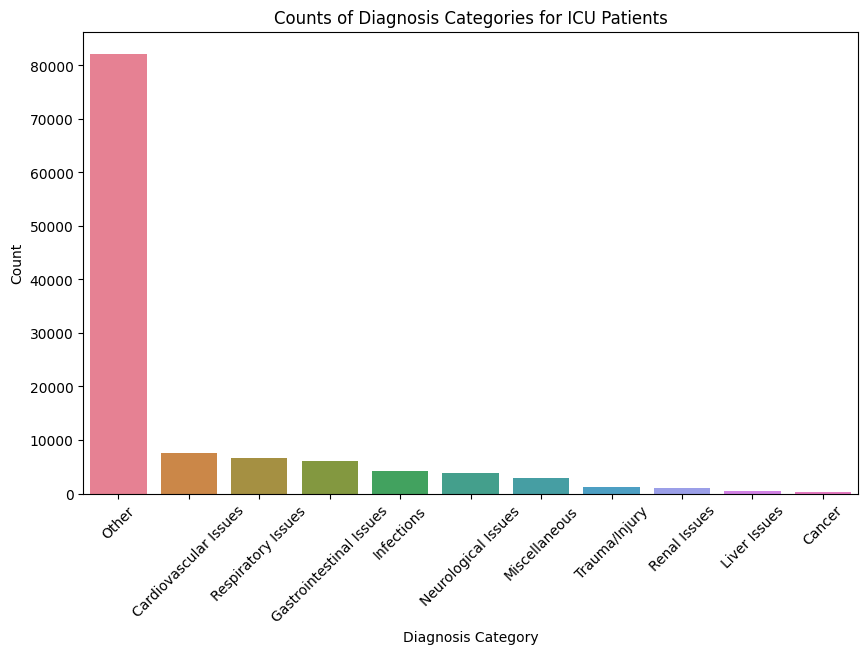

In [14]:
df_b['diagnosis_category'] = mapped_diagnosis(df_b['diagnosis'])
category_counts = df_b['diagnosis_category'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, hue = category_counts.index)
plt.title('Counts of Diagnosis Categories for ICU Patients')
plt.xlabel('Diagnosis Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

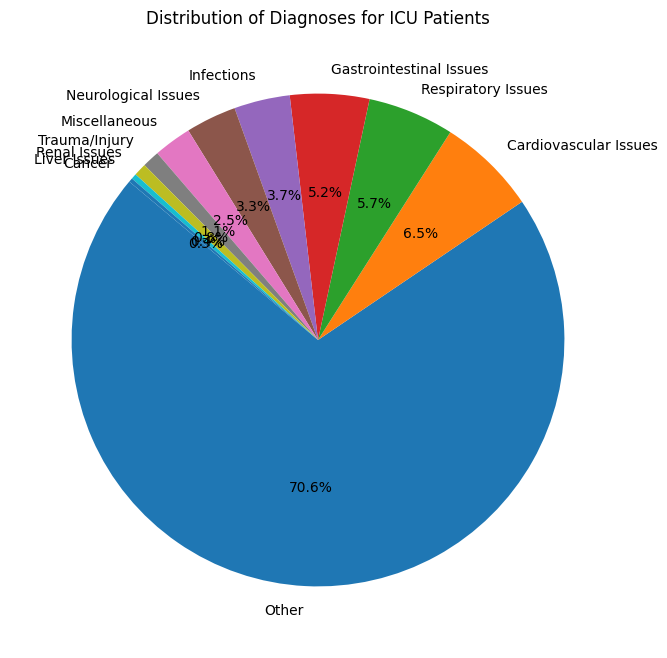

In [30]:
diagnosis_percentages = category_counts / category_counts.sum() * 100

plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Diagnoses for ICU Patients')
plt.show()


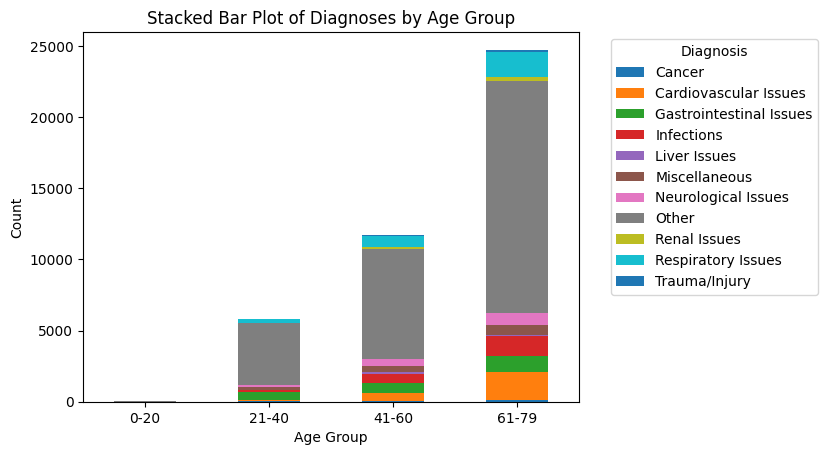

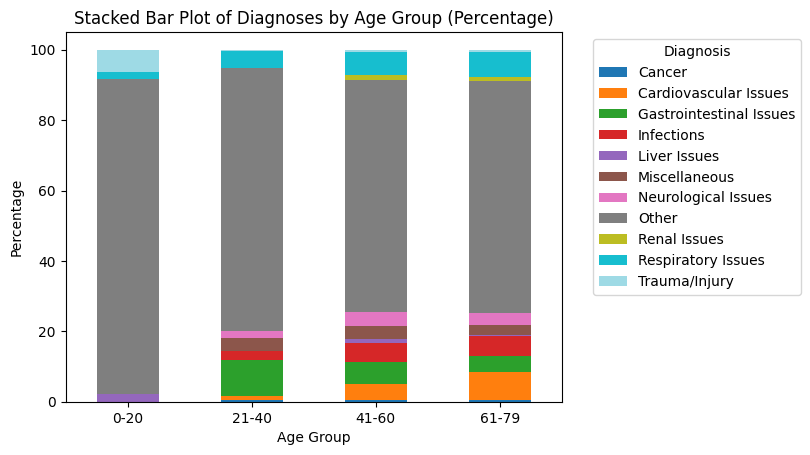

In [31]:
df_b['age_group'] = pd.cut(df_b['age'], bins=[0, 20, 40, 60, 80], labels=['0-20', '21-40', '41-60', '61-79'])
age_diagnosis_counts = df_b.groupby(['age_group', 'diagnosis_category'], observed = False).size().unstack().fillna(0)
age_diagnosis_percents = age_diagnosis_counts.div(age_diagnosis_counts.sum(axis=1), axis=0) * 100

age_diagnosis_counts.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of Diagnoses by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Diagnosis', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

age_diagnosis_percents.plot(kind='bar', stacked=True, colormap='tab20')
plt.title('Stacked Bar Plot of Diagnoses by Age Group (Percentage)')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Diagnosis', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

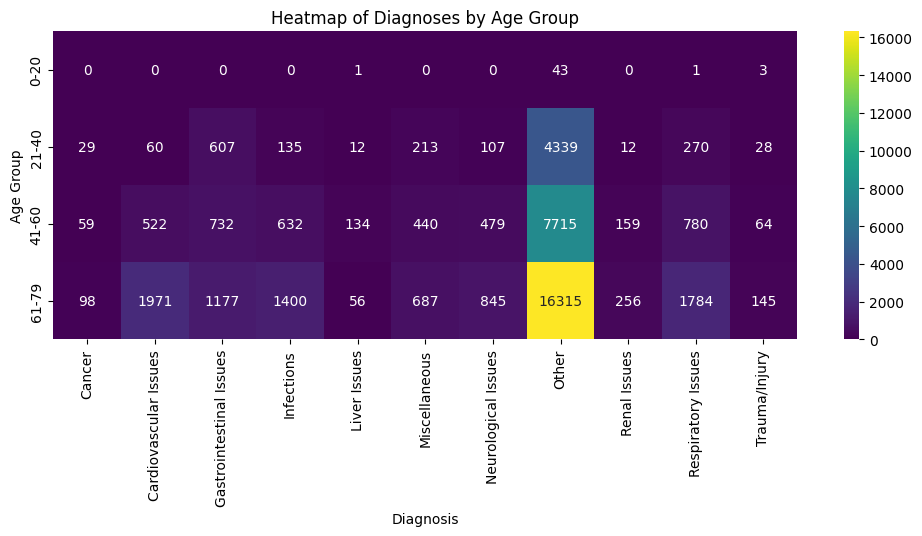

In [32]:
heatmap_data = df_b.pivot_table(index='age_group', columns='diagnosis_category', aggfunc='size', fill_value=0, observed = False)

plt.figure(figsize=(12, 4))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d')
plt.title('Heatmap of Diagnoses by Age Group')
plt.xlabel('Diagnosis')
plt.ylabel('Age Group')
plt.show()

### Time Analysis

In [34]:
### How do patient outcomes vary by season or time of admission?
### Are there any seaonsal trends in specific diagnoses?
df_c = query_c()

print(df_c.head(2))
df_c.info()

             admittime insurance      religion marital_status ethnicity  \
0  2196-04-09 12:26:00   Private  UNOBTAINABLE        MARRIED     WHITE   
1  2153-09-03 07:15:00  Medicare      CATHOLIC        MARRIED     WHITE   

                                           diagnosis  hospital_expire_flag  
0                            BENZODIAZEPINE OVERDOSE                     0  
1  CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...                     0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   admittime             58976 non-null  object
 1   insurance             58976 non-null  object
 2   religion              58518 non-null  object
 3   marital_status        48848 non-null  object
 4   ethnicity             58976 non-null  object
 5   diagnosis             58951 non-null  object
 6   hospital_expire_flag  58976 no

Notice the error in computing the admission time in the dataset. For analysis purposes, years such as "2149" were converted to their 20th century counterpart, like "1949". The addition of a datetime column to our query allows for time series analysis to be conducted: were ICU admissions more common in the daytime or nighttime? Is there a season that sees more ICU admissions than others?

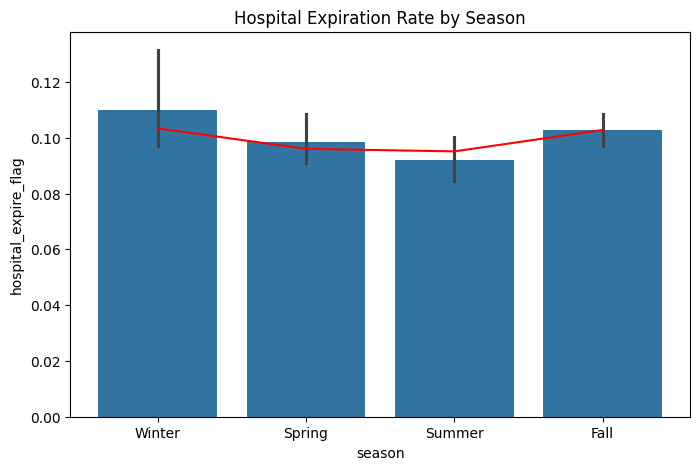

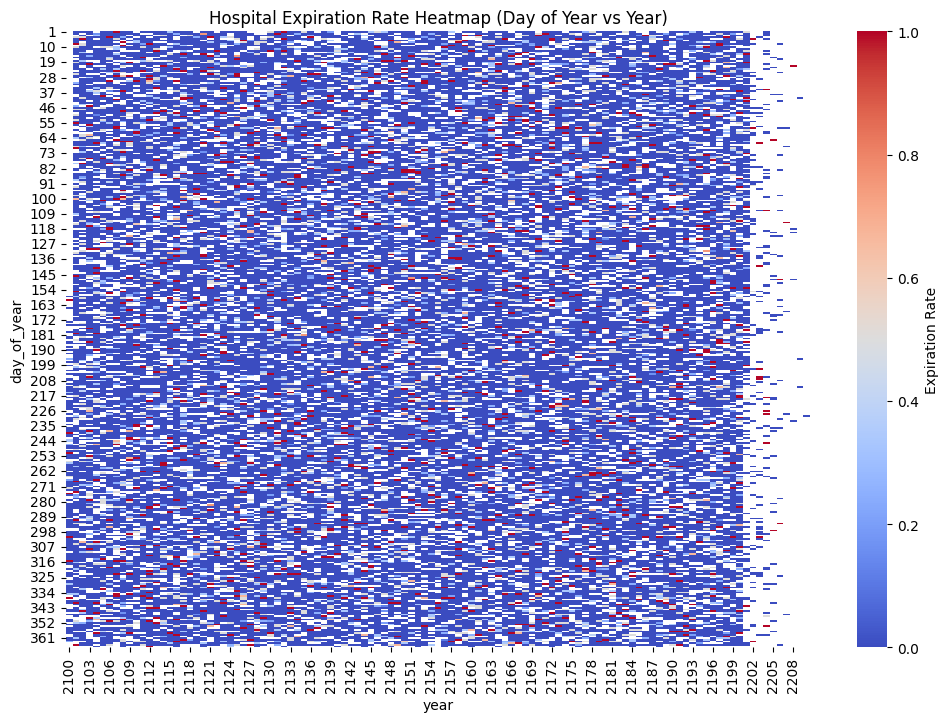

   season  Total Patients  Expired Patients  Percent Mortality Rate (%)
0  Winter           14613              1510                   10.333265
1  Spring           14634              1405                    9.600929
2  Summer           15143              1440                    9.509344
3    Fall           14586              1499                   10.276978


In [35]:
df_c['year'] = pd.to_datetime(df_c['admittime']).dt.year
df_c['month'] = pd.to_datetime(df_c['admittime']).dt.month
df_c['day_of_year'] = pd.to_datetime(df_c['admittime']).dt.dayofyear
df_c['season'] = pd.cut(df_c['month'], bins=[0, 3, 6, 9, 12], 
                        labels=['Winter', 'Spring', 'Summer', 'Fall'], 
                        include_lowest=True)
day_year_pivot = df_c.pivot_table(index='day_of_year', columns='year', values='hospital_expire_flag', aggfunc='mean')

seasonal_expire_rate_yearly = df_c.groupby(['year', 'season'], observed = False)['hospital_expire_flag'].mean().reset_index()
seasonal_expire_rate = df_c.groupby('season', observed = False)['hospital_expire_flag'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='season', y='hospital_expire_flag', data=seasonal_expire_rate_yearly)
sns.lineplot(x = 'season', y = 'hospital_expire_flag', data = seasonal_expire_rate, color = 'red')
plt.title('Hospital Expiration Rate by Season')
plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(day_year_pivot, cmap='coolwarm', cbar_kws={'label': 'Expiration Rate'})
plt.title('Hospital Expiration Rate Heatmap (Day of Year vs Year)')
plt.show()

seasonal_summary = df_c.groupby('season', observed = False).agg(
    total_patients=('hospital_expire_flag', 'size'),  # patients per season
    expired_patients=('hospital_expire_flag', 'sum')  # expired patients per season
).reset_index()
seasonal_summary['mortality_rate'] = (seasonal_summary['expired_patients'] / seasonal_summary['total_patients']) * 100

print(seasonal_summary[['season', 'total_patients', 'expired_patients', 'mortality_rate']].rename(
    columns={
        'total_patients': 'Total Patients',
        'expired_patients': 'Expired Patients',
        'mortality_rate': 'Percent Mortality Rate (%)'
    }
))

[no significant trends in season, can confirm by non-normal anovas (wilcox?)]

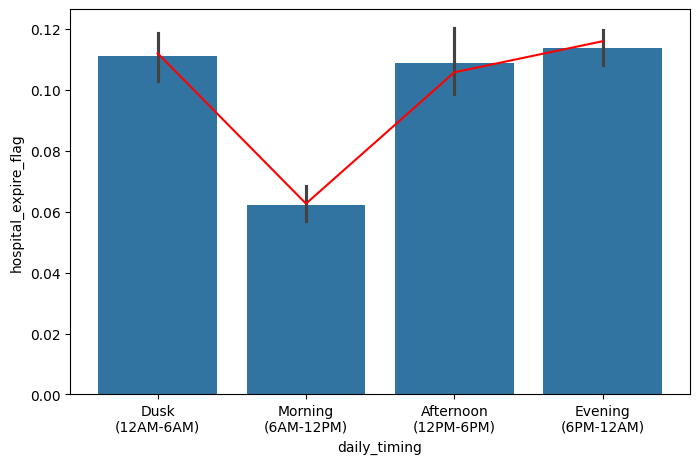

            daily_timing  Total Patients  Expired Patients  \
0       Dusk\n(12AM-6AM)            9973              1118   
1    Morning\n(6AM-12PM)           14129               886   
2  Afternoon\n(12PM-6PM)           19429              2057   
3    Evening\n(6PM-12AM)           15445              1793   

   Percent Mortality Rate (%)  
0                   11.210268  
1                    6.270791  
2                   10.587266  
3                   11.608935  


In [37]:
df_c['hour'] = pd.to_datetime(df_c['admittime']).dt.hour
df_c['daily_timing'] = pd.cut(df_c['hour'], bins=[0, 6, 12, 18, 24], 
                        labels=['Dusk\n(12AM-6AM)', 'Morning\n(6AM-12PM)', 'Afternoon\n(12PM-6PM)', 'Evening\n(6PM-12AM)'], 
                        include_lowest=True)

daily_expire_rate_yearly = df_c.groupby(['year', 'daily_timing'], observed = False)['hospital_expire_flag'].mean().reset_index()
daily_expire_rate = df_c.groupby('daily_timing', observed = False)['hospital_expire_flag'].mean().reset_index()

plt.figure(figsize = (8,5))
sns.barplot(x = 'daily_timing', y = 'hospital_expire_flag', data = daily_expire_rate_yearly)
sns.lineplot(x = 'daily_timing', y = 'hospital_expire_flag', data = daily_expire_rate, color = 'red')
plt.show()

daily_summary = df_c.groupby('daily_timing', observed = False).agg(
    total_patients = ('hospital_expire_flag', 'size'),
    expired_patients = ('hospital_expire_flag', 'sum')
).reset_index()
daily_summary['mortality_rate'] = daily_summary['expired_patients'] / daily_summary['total_patients'] * 100

print(daily_summary[['daily_timing', 'total_patients', 'expired_patients', 'mortality_rate']].rename(
    columns={
        'total_patients': 'Total Patients',
        'expired_patients': 'Expired Patients',
        'mortality_rate': 'Percent Mortality Rate (%)'
    }
))

[trends about regarding morning - fewest admitted patients]

### Predictions of Patient Readmission

In [62]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE, SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import datetime as dt
import math

In [39]:
### What key features identify a patient as being high risk for readmission?

df_d = query_d()
df_d['diagnosis_category'] = mapped_diagnosis(df_d['diagnosis'])
'''
print(df_d.head())
df_d.info()

print(df_d['readmission_flag].value_counts())
sns.histplot(df_d['readmission_flag'])
plt.show() # 11 readmissions, 79 non-readmissions
'''

"\nprint(df_d.head())\ndf_d.info()\n\nprint(df_d['readmission_flag].value_counts())\nsns.histplot(df_d['readmission_flag'])\nplt.show() # 11 readmissions, 79 non-readmissions\n"

In [40]:
# readmission_flag = patient will be readmitted within 30 days of this ICU admission
### preprocessing data
df_d['admit_month'] = pd.to_datetime(df_d['admittime']).dt.month
df_d['admit_day_of_year'] = pd.to_datetime(df_d['admittime']).dt.dayofyear
df_d['admit_season'] = pd.cut(df_d['admit_month'], bins=[0, 3, 6, 9, 12], 
                        labels=['Winter', 'Spring', 'Summer', 'Fall'], 
                        include_lowest=True)
df_d['admit_hour'] = pd.to_datetime(df_d['admittime']).dt.hour
df_d['admit_timing'] = pd.cut(df_d['admit_hour'], bins=[0, 6, 12, 18, 24], 
                        labels=['Dusk', 'Morning', 'Afternoon', 'Evening'], 
                        include_lowest=True)

df_d['disch_month'] = pd.to_datetime(df_d['dischtime']).dt.month
df_d['disch_day_of_year'] = pd.to_datetime(df_d['admittime']).dt.dayofyear
df_d['disch_season'] = pd.cut(df_d['disch_month'], bins=[0, 3, 6, 9, 12], 
                        labels=['Winter', 'Spring', 'Summer', 'Fall'], 
                        include_lowest=True)
df_d['disch_hour'] = pd.to_datetime(df_d['dischtime']).dt.hour
df_d['disch_timing'] = pd.cut(df_d['disch_hour'], bins=[0, 6, 12, 18, 24], 
                        labels=['Dusk', 'Morning', 'Afternoon', 'Evening'], 
                        include_lowest=True)

df_d = df_d.drop(labels = ['admittime', 'dischtime', 'diagnosis', 'admit_month', 'disch_month', 'admit_hour', 'disch_hour'], axis = 1)
df_d = pd.get_dummies(df_d, columns = ['admission_type', 'gender', 'diagnosis_category', 'admit_timing', 'disch_timing', 'admit_season', 'disch_season'])


In [117]:
from sklearn.model_selection import GridSearchCV

df_d_no_nan = df_d[df_d['los'].notnull()]

X = df_d_no_nan.drop('readmission_flag', axis=1)
y = df_d_no_nan['readmission_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify= y)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs', 'newton-cholesky', 'liblinear']} # iterate over inverse  of regularization strength (C) and solver
model = GridSearchCV(LogisticRegression(penalty = 'l2', max_iter = 100000, class_weight = 'balanced'), param_grid, scoring = 'f1')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Best hyperparameters used in this logistic regression model with all features:")
print(model.best_params_)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

## all features included is kind of bad, not very accurate. see below for feature selection

Best hyperparameters used in this logistic regression model with all features:
{'C': 1, 'solver': 'liblinear'}
[[5915 6932]
 [ 247  635]]
              precision    recall  f1-score   support

           0       0.96      0.46      0.62     12847
           1       0.08      0.72      0.15       882

    accuracy                           0.48     13729
   macro avg       0.52      0.59      0.39     13729
weighted avg       0.90      0.48      0.59     13729



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36


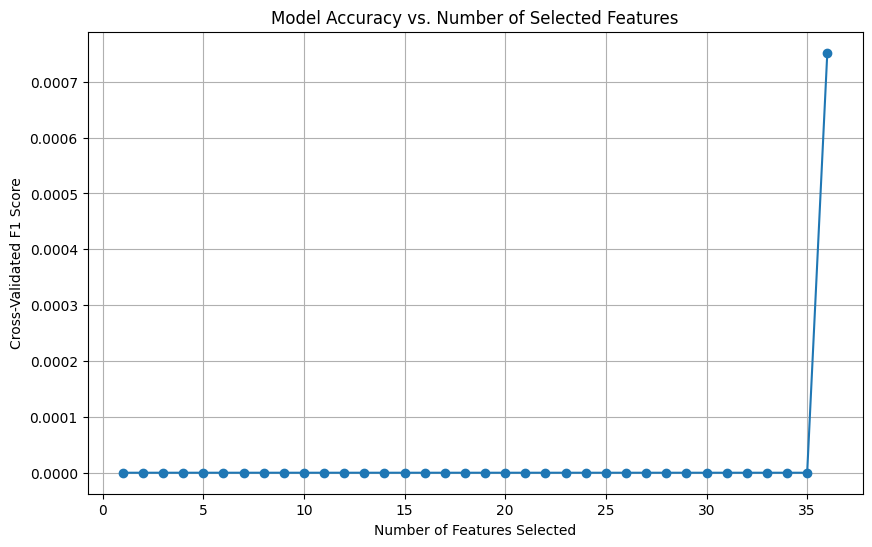

Top 3 models with number of features and accuracy scores:
1. Number of Features: 36, Accuracy: 0.0008
2. Number of Features: 35, Accuracy: 0.0000
3. Number of Features: 34, Accuracy: 0.0000


In [78]:
# using the same X, y, model, etc.
model = LogisticRegression(C = 10, penalty = 'l2', max_iter = 10000, solver = 'lbfgs')

feature_range = range(1, X_train.shape[1])
mean_scores = []

for k in feature_range:
    print(k)
    sfs = SequentialFeatureSelector(model,
                                    n_features_to_select = k,
                                    direction = 'forward',
                                    scoring = 'neg_mean_squared_error',
                                    cv = 10,
                                    n_jobs = -1)
    sfs = sfs.fit(X_train, y_train)
    score = np.mean(cross_val_score(model, X_train.iloc[:, sfs.get_support()], y_train, cv = 10, scoring = 'f1'))
    mean_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(feature_range, mean_scores, marker='o')
plt.title('Model Accuracy vs. Number of Selected Features')
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross-Validated F1 Score')
plt.grid()
plt.show()

top_n = 3
top_indices = np.argsort(mean_scores)[-top_n:][::-1]
top_models = [(feature_range[i], mean_scores[i]) for i in top_indices]

print("Top 3 models with number of features and accuracy scores:")
for i, (n_features, score) in enumerate(top_models, start=1):
    print(f"{i}. Number of Features: {n_features}, Accuracy: {score:.4f}")

# based on this output, redo the logistic regression with favored number of featurs
# ran for 1222.5 mins... or 20 HOURS
# DO NOT REPEAT...

In [151]:
model = LogisticRegression(C = 10, penalty = 'l2', max_iter = 10000, solver = 'lbfgs', class_weight = 'balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
f1_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='f1')
print("Average F1 score before SMOTE:", f1_scores.mean())

[[5917 6930]
 [ 249  633]]
              precision    recall  f1-score   support

           0       0.96      0.46      0.62     12847
           1       0.08      0.72      0.15       882

    accuracy                           0.48     13729
   macro avg       0.52      0.59      0.39     13729
weighted avg       0.90      0.48      0.59     13729

Average F1 score before SMOTE: 0.15060465694566333


[note that including all features is best, but is still not accurate and does not correctly score people who are readmitted to the hospital]

In [94]:
# decision trees
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}

clf = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid = params, cv = 10, scoring = 'f1')
clf.fit(X_train, y_train)

print("Best hyperparameters used in this decision tree model with all features:")
print(clf.best_params_)

c:\Users\argam\Desktop\Personal Projects\Health Care Analytics\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best hyperparameters used in this decision tree model with all features:
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 5}


'\ny_pred = clf.predict(X_test)\n\nplt.figure(figsize = (12,5), dpi = 600)\nplot_tree(clf, filled = True, feature_names = X_train.columns, class_names = [\'0\', \'1\'], rounded = True)\nplt.show()\n\ncm = confusion_matrix(y_test, y_pred)\nprint(cm)\nprecision = cm[1][1] / (cm[1][1] + cm[0][1])\nrecall = cm[1][1] / (cm[1][1] + cm[1][0])\naccuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])\nf1 = 2*cm[1][1] / (2*cm[1][1] + cm[0][1] + cm[1][0])\n\nprint(f"Precision: {precision:.2%}")\nprint(f"Recall: {recall:.2%}")\nprint(f"Accuracy: {accuracy:.2%}")\nprint(f"F1: {f1:.2%}")\nprint("")\nprint(classification_report(y_test, y_pred))\n'

In [112]:
# random forest
params = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}

clf = GridSearchCV(RandomForestClassifier(random_state = 42, class_weight = 'balanced'), param_grid = params, cv = 10, scoring = 'f1')
clf.fit(X_train, y_train)

print("Best hyperparameters used in this decision tree model with all features:")
print(clf.best_params_)

Best hyperparameters used in this decision tree model with all features:
{'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}


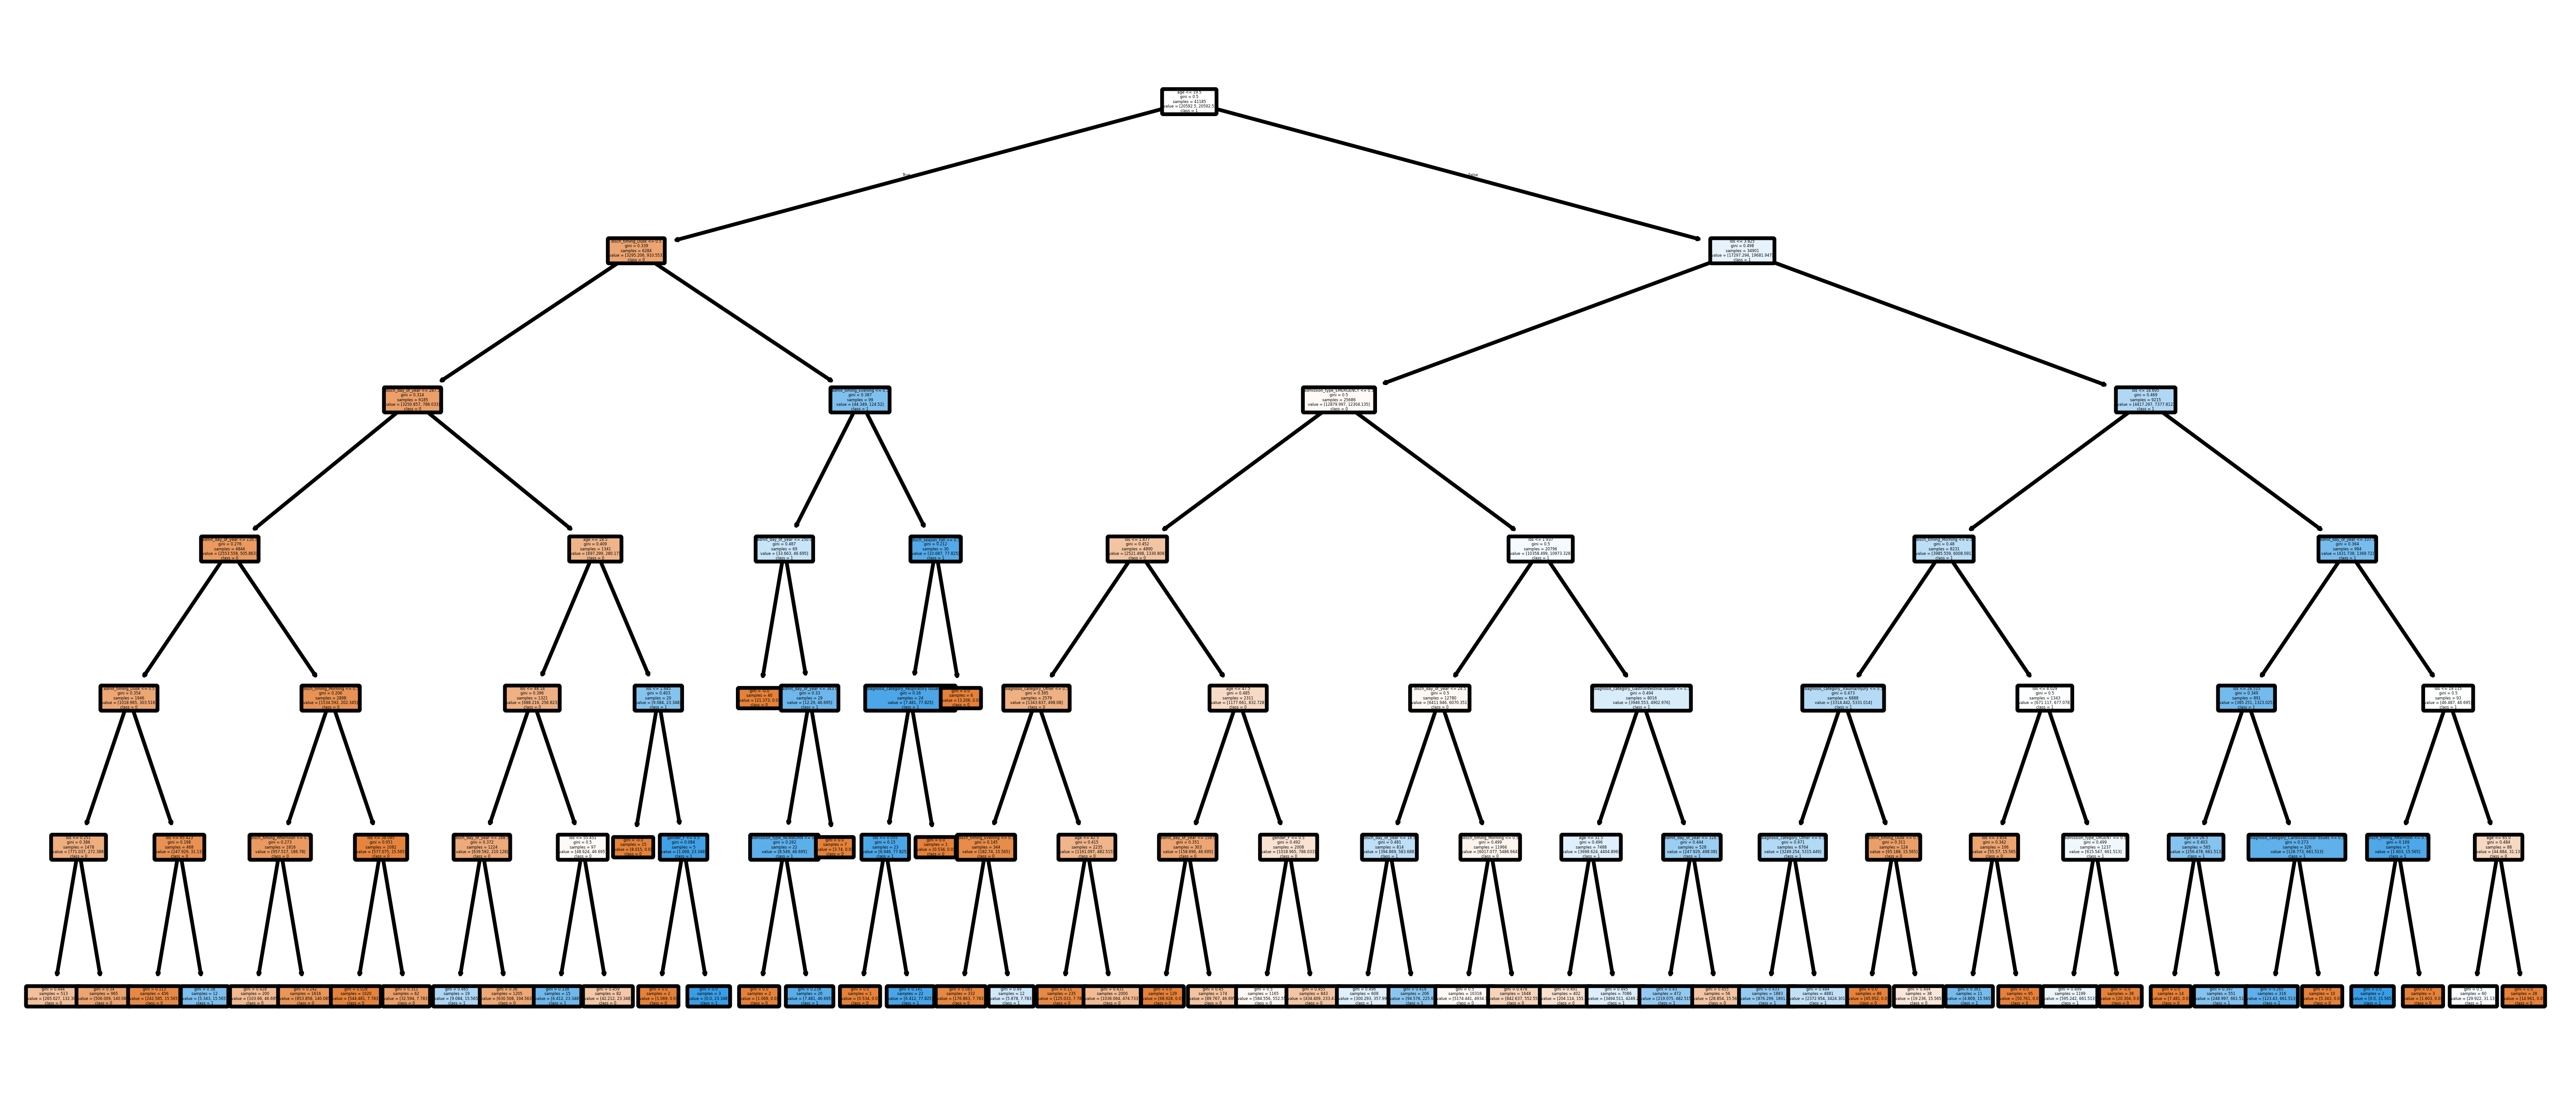

[[7473 5374]
 [ 383  499]]
              precision    recall  f1-score   support

           0       0.95      0.58      0.72     12847
           1       0.08      0.57      0.15       882

    accuracy                           0.58     13729
   macro avg       0.52      0.57      0.43     13729
weighted avg       0.90      0.58      0.69     13729

Average F1 score before SMOTE: 0.15124090415804953


In [150]:
clf = DecisionTreeClassifier(criterion = 'gini',
                             max_depth = 6,
                             min_samples_leaf = 1,
                             min_samples_split = 5,
                             random_state = 42,
                             class_weight = 'balanced')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

plt.figure(figsize = (12,5), dpi = 600)
plot_tree(clf, filled = True, feature_names = X_train.columns, class_names = ['0', '1'], rounded = True)
plt.show()

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
f1_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1')
print("Average F1 score before SMOTE:", f1_scores.mean())

In [149]:
rf = RandomForestClassifier(max_depth = 6,
                            random_state = 42,
                            min_samples_leaf = 4,
                            min_samples_split = 2,
                            class_weight = 'balanced')
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
f1_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='f1')
print("Average F1 score before SMOTE:", f1_scores.mean())

[[5426 7421]
 [ 201  681]]
              precision    recall  f1-score   support

           0       0.96      0.42      0.59     12847
           1       0.08      0.77      0.15       882

    accuracy                           0.44     13729
   macro avg       0.52      0.60      0.37     13729
weighted avg       0.91      0.44      0.56     13729

Average F1 score before SMOTE: 0.15060465694566333


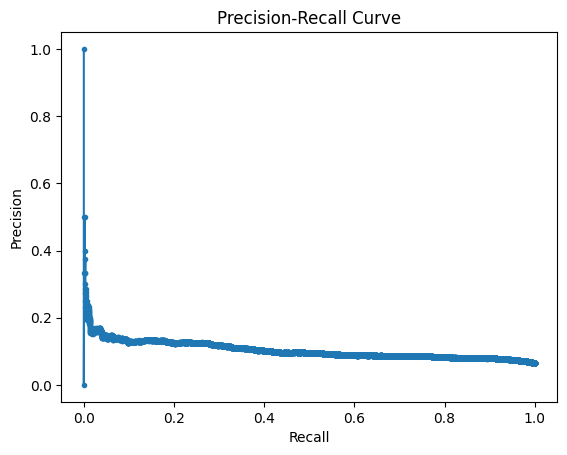

AUC-ROC: 0.6428290783893538
Average F1 score before SMOTE: 0.15060465694566333


In [127]:
from sklearn.metrics import precision_recall_curve, roc_auc_score

y_pred_proba = rf.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

auc_roc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC:", auc_roc)

f1_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='f1')
print("Average F1 score before SMOTE:", f1_scores.mean())

In [128]:
# above models attempted tackling the dataset out of box
# 6% of the testing dataset are 1's meaning that we need
# to create more 1's in the training dataset to compare
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
X_res, y_res = smote.fit_resample(X_train, y_train)

In [148]:
# logistic regression

model = LogisticRegression(C = 1, penalty = 'l2', max_iter = 10000, solver = 'lbfgs', class_weight = None)
model.fit(X_res, y_res)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
f1_scores_res = cross_val_score(model, X_res, y_res, cv=5, scoring='f1')
print("Average F1 score after SMOTE:", f1_scores_res.mean())

[[12844     3]
 [  882     0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     12847
           1       0.00      0.00      0.00       882

    accuracy                           0.94     13729
   macro avg       0.47      0.50      0.48     13729
weighted avg       0.88      0.94      0.90     13729

Average F1 score after SMOTE: 0.931701641468002


In [137]:
# decision tree
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}

clf = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid = params, cv = 10, scoring = 'f1')
clf.fit(X_res, y_res)

print("Best hyperparameters used in this decision tree model with all features:")
print(clf.best_params_)

Best hyperparameters used in this decision tree model with all features:
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}


"\nclf = DecisionTreeClassifier(criterion = 'gini',\n                             max_depth = 6,\n                             min_samples_leaf = 1,\n                             min_samples_split = 5,\n                             random_state = 42,\n                             class_weight = None)\nclf.fit(X_res, y_res)\n\ny_pred = clf.predict(X_test)\n\nplt.figure(figsize = (12,5), dpi = 600)\nplot_tree(clf, filled = True, feature_names = X_res.columns, class_names = ['0', '1'], rounded = True)\nplt.show()\n\ncm = confusion_matrix(y_test, y_pred)\nprint(cm)\nprint(classification_report(y_test, y_pred))\n"

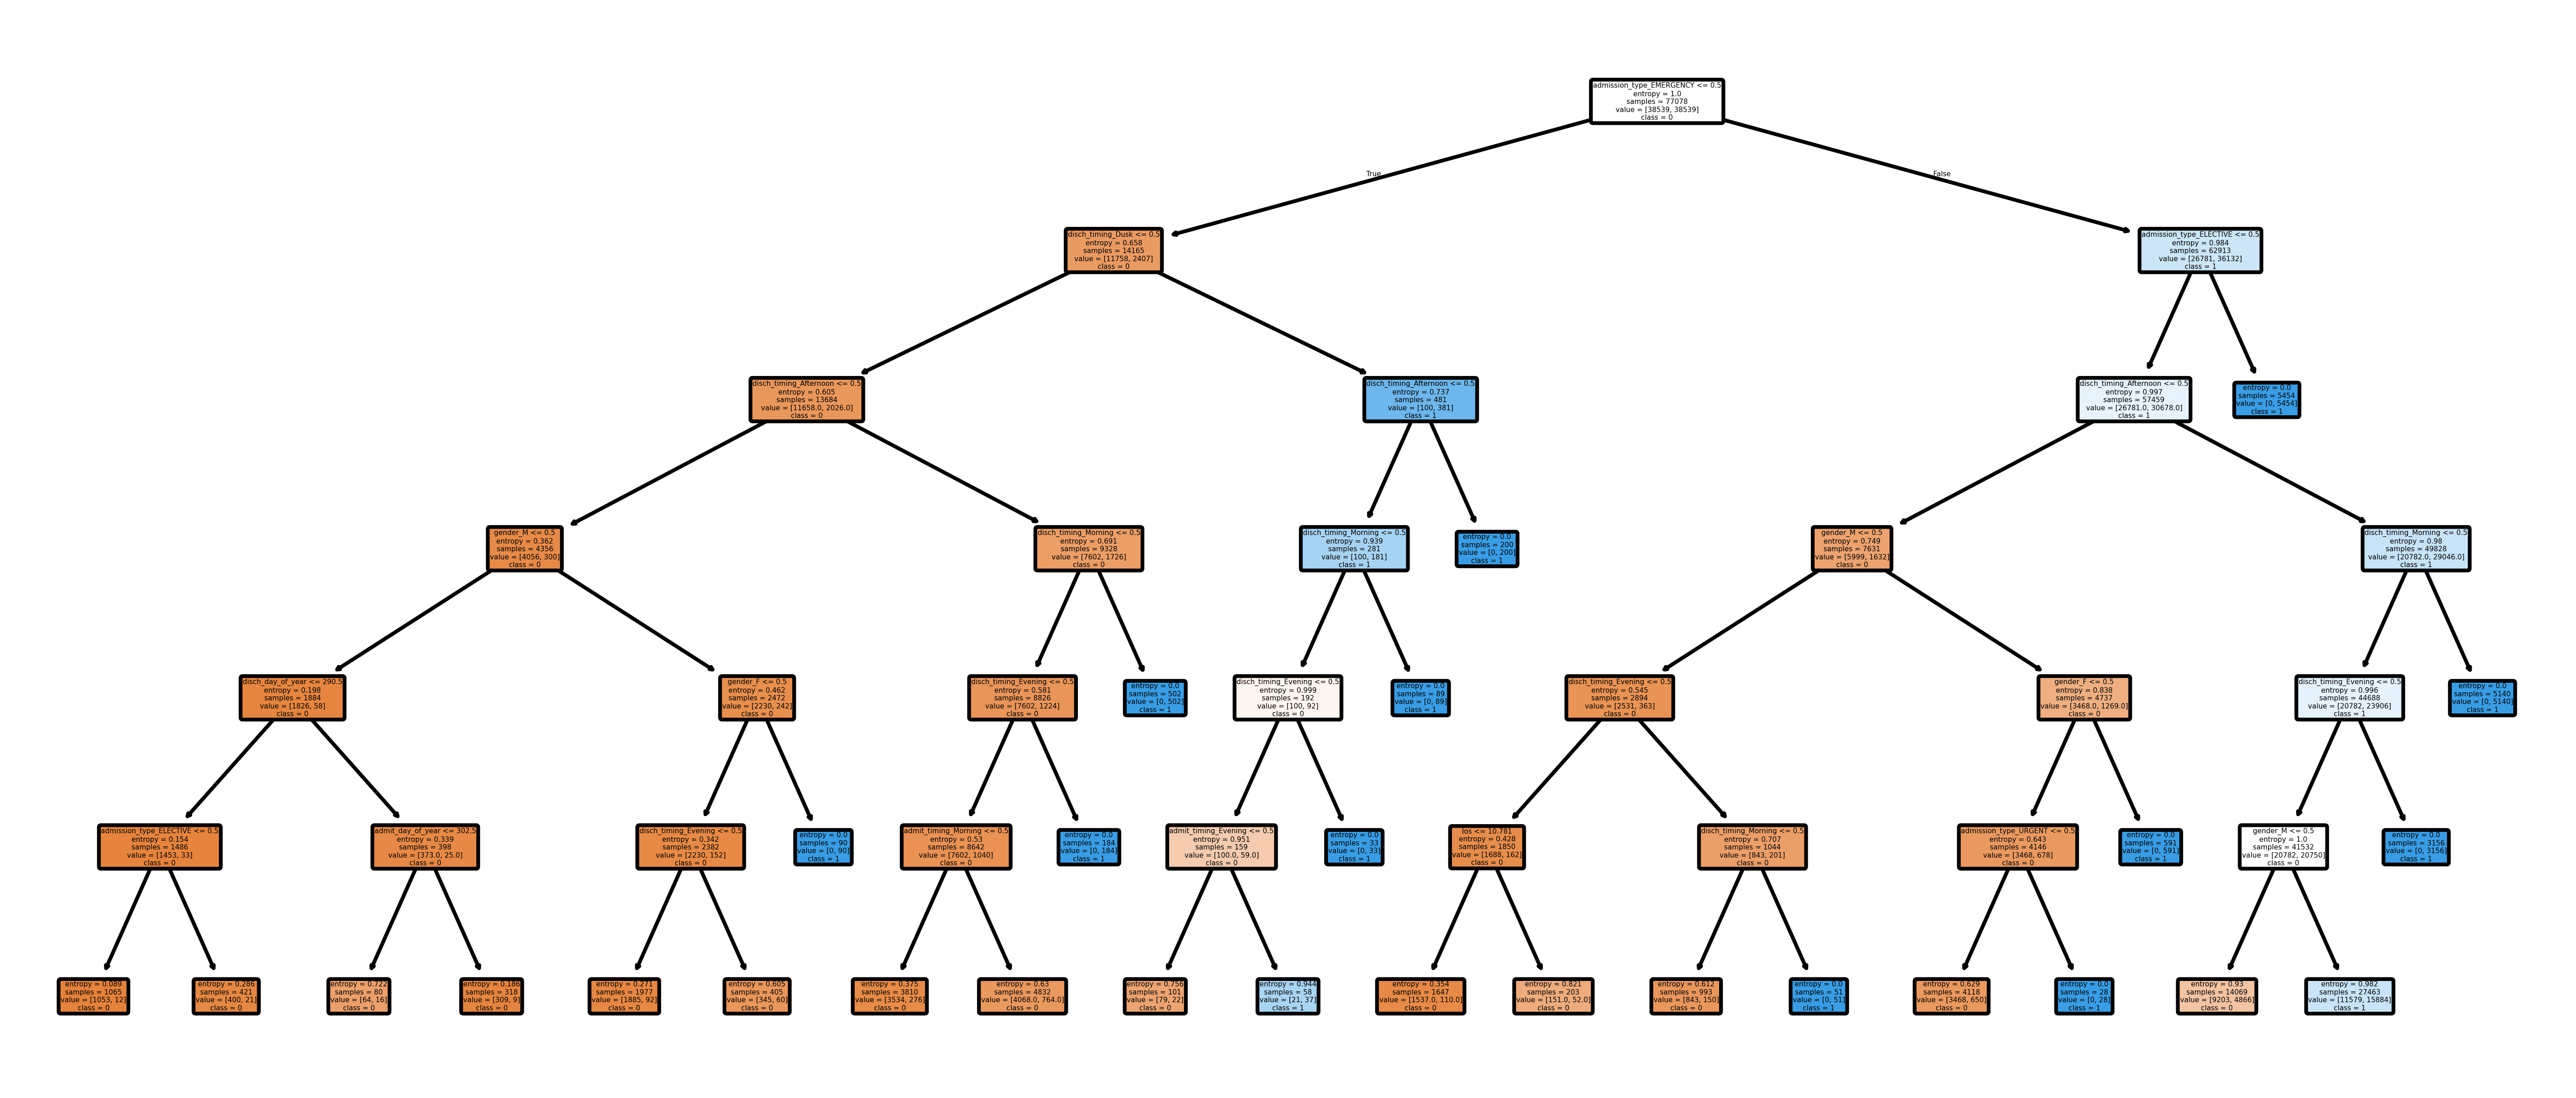

[[9005 3842]
 [ 557  325]]
              precision    recall  f1-score   support

           0       0.94      0.70      0.80     12847
           1       0.08      0.37      0.13       882

    accuracy                           0.68     13729
   macro avg       0.51      0.53      0.47     13729
weighted avg       0.89      0.68      0.76     13729

Average F1 score after SMOTE: 0.7688281047880192


In [147]:
clf = DecisionTreeClassifier(criterion = 'entropy',
                             max_depth = 6,
                             min_samples_leaf = 1,
                             min_samples_split = 2,
                             random_state = 42,
                             class_weight = None)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

plt.figure(figsize = (12,5), dpi = 600)
plot_tree(clf, filled = True, feature_names = X_res.columns, class_names = ['0', '1'], rounded = True)
plt.show()

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
f1_scores_res = cross_val_score(clf, X_res, y_res, cv=5, scoring='f1')
print("Average F1 score after SMOTE:", f1_scores_res.mean())

In [123]:
# random forest

rf = RandomForestClassifier(max_depth=6, random_state=42, min_samples_leaf=1, min_samples_split=2, class_weight=None)
rf.fit(X_res, y_res)

y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

# prev confusion matrix from rf without SMOTE, class_weight = 'balanced'
#[[5426 7421]
# [ 201  681]]
f1_scores_res = cross_val_score(rf, X_res, y_res, cv=5, scoring='f1')
print("Average F1 score after SMOTE:", f1_scores_res.mean())

[[11603  1244]
 [  778   104]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     12847
           1       0.08      0.12      0.09       882

    accuracy                           0.85     13729
   macro avg       0.51      0.51      0.51     13729
weighted avg       0.88      0.85      0.87     13729

Average F1 score after SMOTE: 0.8805446726429293


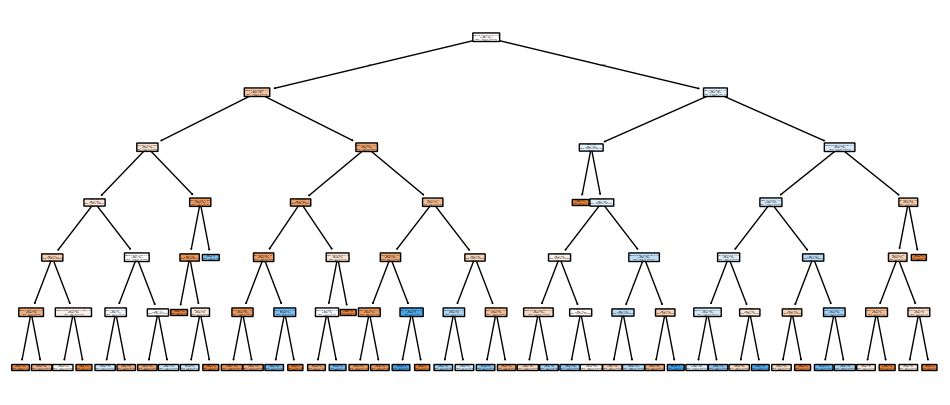

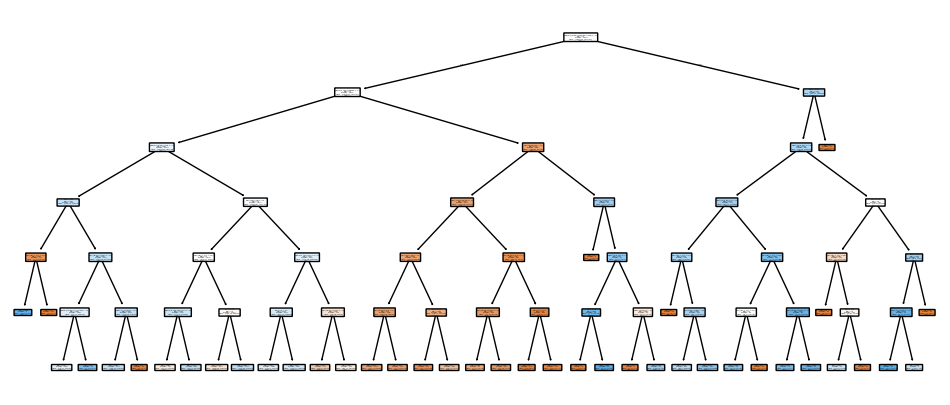

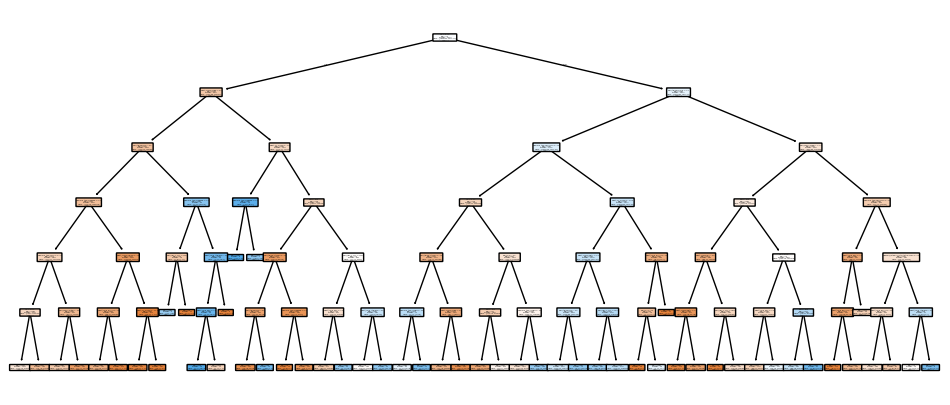

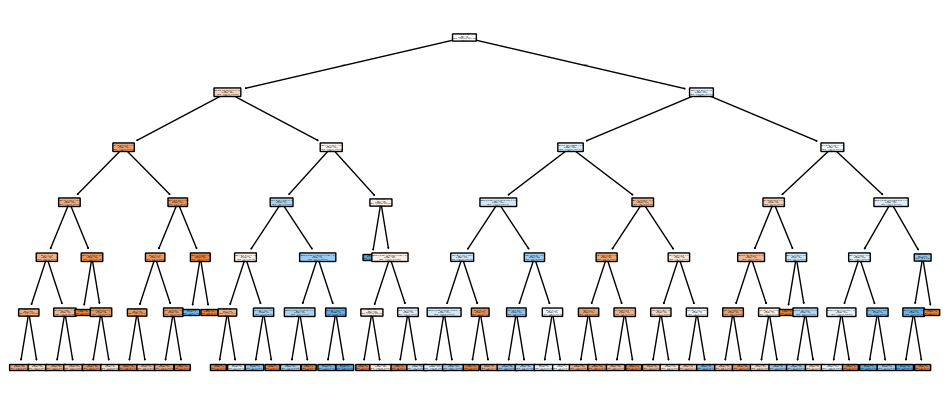

In [136]:
for index in range(0, 4):
    plt.figure(figsize = (12,5))
    plot_tree(rf.estimators_[index], filled = True, feature_names = X_train.columns, class_names = ['0', '1'], rounded = True)
plt.show()


[above are 4 sample decision trees in the random forest. note how random forest regression works by averaging + weighing trees]

In [139]:
# oversampling 1's AND undersampling 0's
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy = 1.0, random_state = 42)
X_resampled, y_resampled = undersample.fit_resample(X_res, y_res)

In [146]:
# logistic regression

model = LogisticRegression(C = 0.1, penalty = 'l2', max_iter = 10000, solver = 'liblinear', class_weight = None)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
f1_scores_res = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='f1')
print("Average F1 score after undersampling 0's and oversampling 1's:", f1_scores_res.mean())

[[12844     3]
 [  882     0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     12847
           1       0.00      0.00      0.00       882

    accuracy                           0.94     13729
   macro avg       0.47      0.50      0.48     13729
weighted avg       0.88      0.94      0.90     13729

Average F1 score after undersampling 0's and oversampling 1's: 0.9314711555079669


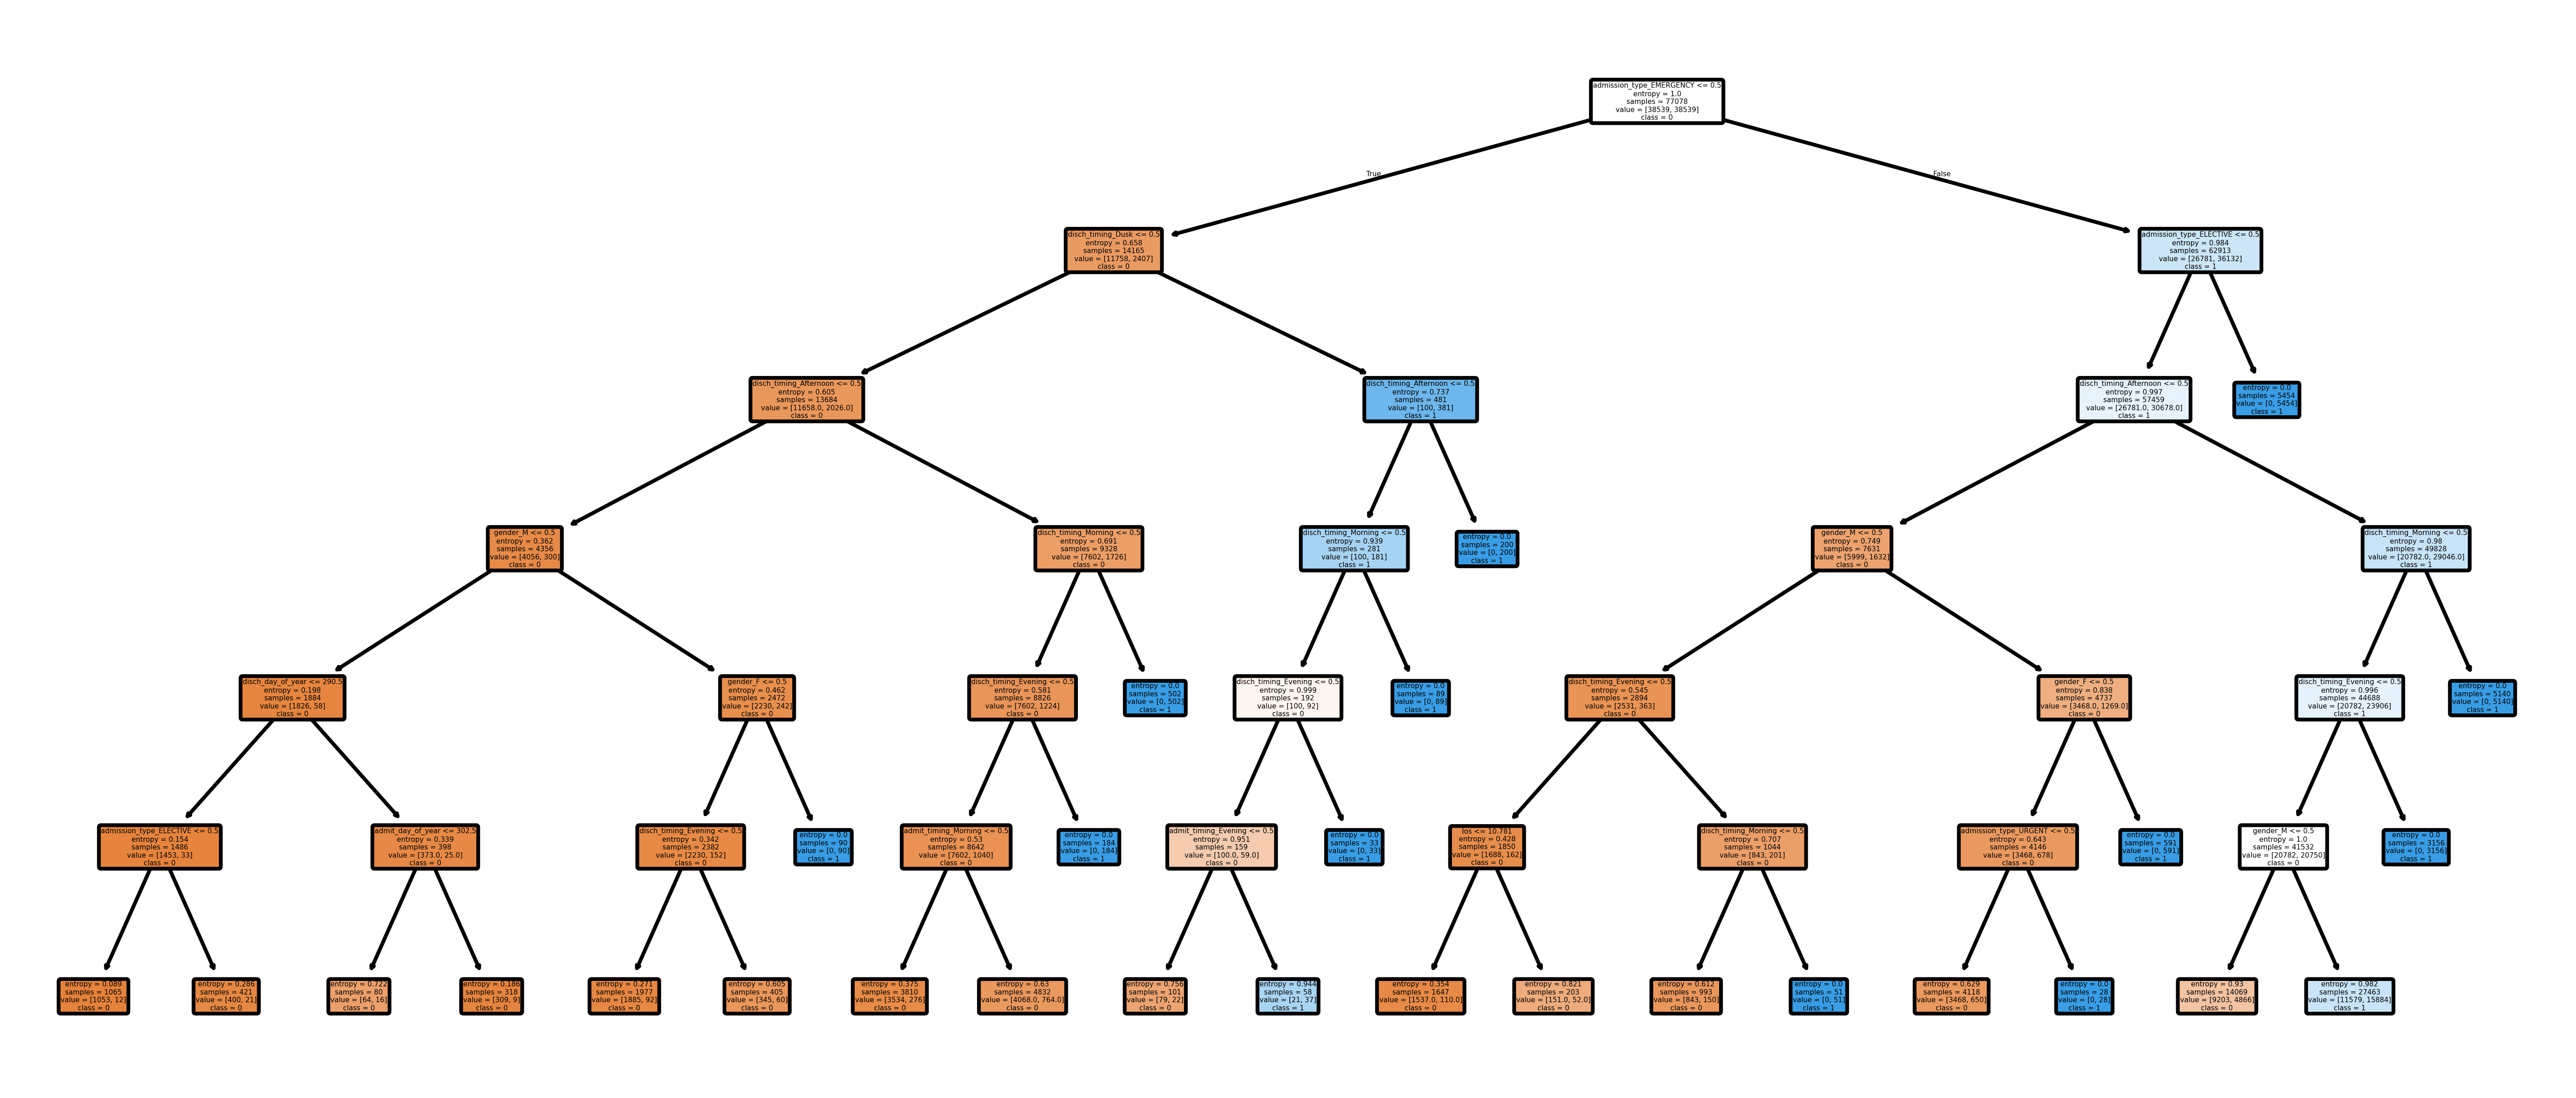

[[9005 3842]
 [ 557  325]]
              precision    recall  f1-score   support

           0       0.94      0.70      0.80     12847
           1       0.08      0.37      0.13       882

    accuracy                           0.68     13729
   macro avg       0.51      0.53      0.47     13729
weighted avg       0.89      0.68      0.76     13729

Average F1 score after undersampling 0's and oversampling 1's: 0.7694362357968698


In [145]:
# decision tree

clf = DecisionTreeClassifier(criterion = 'entropy',
                             max_depth = 6,
                             min_samples_leaf = 1,
                             min_samples_split = 2,
                             random_state = 42,
                             class_weight = None)
clf.fit(X_resampled, y_resampled)

y_pred = clf.predict(X_test)

plt.figure(figsize = (12,5), dpi = 600)
plot_tree(clf, filled = True, feature_names = X_resampled.columns, class_names = ['0', '1'], rounded = True)
plt.show()

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
f1_scores_res = cross_val_score(clf, X_resampled, y_resampled, cv=5, scoring='f1')
print("Average F1 score after undersampling 0's and oversampling 1's:", f1_scores_res.mean())

In [144]:
# random forest

rf = RandomForestClassifier(max_depth=6, random_state=42, min_samples_leaf=1, min_samples_split=2, class_weight=None)
rf.fit(X_resampled, y_resampled)

y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

f1_scores_res = cross_val_score(rf, X_resampled, y_resampled, cv=5, scoring='f1')
print("Average F1 score after undersampling 0's and oversampling 1's:", f1_scores_res.mean())

[[11504  1343]
 [  768   114]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     12847
           1       0.08      0.13      0.10       882

    accuracy                           0.85     13729
   macro avg       0.51      0.51      0.51     13729
weighted avg       0.88      0.85      0.86     13729

Average F1 score after undersampling 0's and oversampling 1's: 0.8916077056838414


In [169]:
df = pd.DataFrame(
    data = {
        "Logistic Regression": [0.1506, 0.9317, 0.9315],
        "Decision Tree": [0.1512, 0.7688, 0.7694],
        "Random Forest": [0.1506, 0.8805, 0.8916]
    },
    index = ['Before SMOTE', 'SMOTE Oversampling 1s', 'SMOTE Undersampling 0s']
)
print(df.to_markdown(numalign = 'center'))

|                        |  Logistic Regression  |  Decision Tree  |  Random Forest  |
|:-----------------------|:---------------------:|:---------------:|:---------------:|
| Before SMOTE           |        0.1506         |     0.1512      |     0.1506      |
| SMOTE Oversampling 1s  |        0.9317         |     0.7688      |     0.8805      |
| SMOTE Undersampling 0s |        0.9315         |     0.7694      |     0.8916      |


In [241]:
## idk
# captions:
#txt = "string"
#plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)

100


'\ncm = confusion_matrix(y_test, y_pred)\nprint(cm)\nprecision = cm[1][1] / (cm[1][1] + cm[0][1])\nrecall = cm[1][1] / (cm[1][1] + cm[1][0])\naccuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])\nf1 = 2*cm[1][1] / (2*cm[1][1] + cm[0][1] + cm[1][0])\n\nprint(f"Precision: {precision:.2%}")\nprint(f"Recall: {recall:.2%}")\nprint(f"Accuracy: {accuracy:.2%}")\nprint(f"F1: {f1:.2%}")\n'

gonna make a ML model that assess whether a patient is likely for readmission given certain features about them

random forest? logistic regression? whata re some other models I can look at? // elbow test ... (specific diagnoses <- male patient comes in at 3pm on saturday, what is the highest likelihood for this to be classified as --> corr not caus) ** looking for one big bend


## Results and Discussion

[more words go here]

## Supplemental Figures